Dans ce notebook nous allons résoudre les petits exercices proposés en cours. Commençons par importer les bibliothèques qui nous seront utiles.

In [1]:
import numpy as np                  # for computations
import matplotlib.pyplot as plt     # for displays
import sys                          # for error management

Nous avons vu deux fonctions en classe : l'IMC et la fonction de Rosenbrock.
$$
\begin{cases}
\text{IMC} : (x,y) \mapsto \frac{y^2}{x}\\
\text{R} : (x,y) \mapsto (1-x)^2 + 100(y-x^2)^2
\end{cases}
$$

In [2]:
def IMC(x,y):
  """
  this function evaluates the IMC at x and y which may be scalars of arrays with the same shape.
  """
  if type(x) is np.ndarray and type(y) is np.ndarray:
    if x.shape != y.shape:
      print("ERROR : x and y shapes don't match in IMC")
      sys.exit()
  return (y**2)/x

def Rosenbrock(x,y):
  """
  this function evaluates the Rosenbrock function at x and y which may be scalars of arrays with the same shape.
  """
  if type(x) is np.ndarray and type(y) is np.ndarray:
    if x.shape != y.shape:
      print("ERROR : x and y shapes don't match in Rosenbrock function")
      sys.exit()
  return (1-x)**2 + 100 * ((y-x**2)**2)

On va tester nos fonctions et afficher l'allure de nos courbes

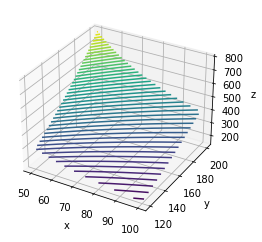

In [3]:
x = np.linspace(50, 100, 300)   # x is the weight in [50kg ; 100kg] and we linearly sample 300 values
y = np.linspace(120, 200, 300)  # y is the height in [120cm ; 200cm] and we linearly sample 300 values

def plot_func(func, x, y):
  X, Y = np.meshgrid(x, y)
  Z = func(X, Y)
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.contour3D(X, Y, Z, 50)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

plot_func(func=IMC, x=x, y=y)

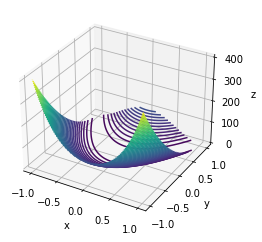

In [4]:
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
plot_func(func=Rosenbrock, x=x, y=y)

Bien ! Maintenant nous allons calculer les dérivées partielles. 

In [5]:
def partial_derivative_IMC(var, x, y):
  if var == 'x':
    return -(y**2)/(x**2)
  elif var == 'y':
    return 2*y/x
  else:
    print('ERROR : not implemented yet')
    sys.exit()

def partial_derivative_Rosenbrock(var, x, y):
  if var == 'x':
    return 2 * (-1 + x + 200 * x**3 - 200 * x * y)
  elif var == 'y':
    return 200 * (-x**2 + y)
  else:
    print('ERROR : not implemented yet')
    sys.exit()

def partial_derivative(func, var, x, y):
  if func == 'IMC':
    return partial_derivative_IMC(var=var, x=x, y=y)
  elif func == 'Rosenbrock':
    return partial_derivative_Rosenbrock(var=var, x=x, y=y)
  else:
    print('ERROR : func %s not available yet'%(func))
    sys.exit()

Nous allons vérifier les formules en comparant les valeurs obtenues avec la formule de la dérivée simple 
$$
f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}
$$

In [6]:
# first we select x and y randomly 
x = np.random.uniform()
y = np.random.uniform()
print('x : %.3f and y : %.3f'%(x,y)) # note the formating %.3f isntead of %f, this indicates that we want only 3 decimals
h = 1e-6

# let's test the IMC
df_formula = partial_derivative(func='IMC', var='x', x=x, y=y)
df_approx = (IMC(x+h,y)-IMC(x,y))/h
print('\t    --- IMC ---')
print('From explicit derivative : %.3f\nFrom approx method : %.3f\nError is : %.6f'
  %(df_formula,df_approx, np.abs(df_formula-df_approx)))

# let's test the Rosenbrock function
df_formula = partial_derivative(func='Rosenbrock', var='y', x=x, y=y)
df_approx = (Rosenbrock(x,y+h)-Rosenbrock(x,y))/h
print('\t--- Rosenbrock ---')
print('From explicit derivative : %.3f\nFrom approx method : %.3f\nError is : %.6f'
  %(df_formula,df_approx, np.abs(df_formula-df_approx)))

x : 0.083 and y : 0.012
	    --- IMC ---
From explicit derivative : -0.021
From approx method : -0.021
Error is : 0.000000
	--- Rosenbrock ---
From explicit derivative : 1.004
From approx method : 1.004
Error is : 0.000100


L'erreur devrait être faible. C'est toujours une bonne pratique de vérifier les calculs quand c'est possible. Particulièrement en informatique.

Nous allons maintenant chercher les points critiques de nos fonctions. Commençons par l'IMC dont les dérivées partielles sont :
$$
\frac{\partial f}{\partial x}(\textbf{x},\textbf{y}) = -\frac{\textbf{y}^2}{\textbf{x}^2} \quad \text{and} \quad \frac{\partial f}{\partial y}(\textbf{x},\textbf{y}) = 2\frac{\textbf{y}}{\textbf{x}}
$$
On cherche maintenant les valeurs de $\textbf{x},\textbf{y}$ qui annulent les deux équations. L'ensemble des solutions est 
$$
\left\{ (\textbf{x},\textbf{y}) | \textbf{x} \neq 0 \text{ ,} \textbf{y} = 0) \right\}
$$
On a donc une infinité de points critiques sur la droite définie par $y=0$. En regardant la surface (courbe en 3d) on voit que pour $x>0$ ce sont des minimums locaux et pour $x<0$ ce sont des maximum locaux.

Dans le cas de fonction de Rosenbrock :
$$
\frac{\partial f}{\partial x}(\textbf{x},\textbf{y}) = 2(200x^3 - 200 xy + x - 1) \quad \text{and} \quad \frac{\partial f}{\partial y}(\textbf{x},\textbf{y}) = 200 (y -x^2)
$$
Nous avons donc deux équations à résoudre. De l'équation obtenue par la dérivée en $y$, on déduit : $y = x^2$. Ce qui simplifie la première équation issue de la dérivée en $x$. On obtient : $x = 1$ et $y = 1$.

Pour montrer que c'est un minimum on a deux méthodes. Une méthode qui mérite la peine de mort : "on voit sur la courbe" (oui on a fait ça pour l'IMC mais... ici on peut facilement faire mieux donc on va faire mieux). La seconde méthode repose sur la remarque suivante : la fonction de rosenbrock est une somme de carrés et est donc positive. Or en $(1,1)$ la fonction vaut $0$ c'est donc son minimum global.



---
Il nous reste à calculer les dérivées secondes de nos fonctions et le TP sera terminé.


In [ ]:
def partial_derivative_IMC(var, x, y):
  if var == 'x':
    return -(y**2)/(x**2)
  elif var == 'y':
    return 2*y/x
  elif var == 'xx':
    return (2 * y ** 2)/(x**3)
  elif var == 'yx' or var == 'xy':
    return -2*y/(x**2)
  elif var == 'yy':
    return 2/x
  else:
    print('ERROR : not implemented yet')
    sys.exit()

def partial_derivative_Rosenbrock(var, x, y):
  if var == 'x':
    return 2 * (-1 + x + 200 * x**3 - 200 * x * y)
  elif var == 'y':
    return 200 * (-x**2 + y)
  elif var == 'xx':
    return 2 + 1200 *x**2 - 400 *y
  elif var == 'yx' or var == 'xy':
    return 200 * (-2*x)
  elif var == 'yy':
    return 200 * (-x**2)
  else:
    print('ERROR : not implemented yet')
    sys.exit()

def partial_derivative(func, var, x, y):
  if func == 'IMC':
    return partial_derivative_IMC(var=var, x=x, y=y)
  elif func == 'Rosenbrock':
    return partial_derivative_Rosenbrock(var=var, x=x, y=y)
  else:
    print('ERROR : func %s not available yet'%(func))
    sys.exit()

Encore une fois, on va vérifier nos formules avec la même méthode que précédemment.

In [ ]:
# first we select x and y randomly 
x = np.random.uniform()
y = np.random.uniform()
print('x : %.3f and y : %.3f'%(x,y))
h = 1e-6

# let's test the IMC
df_formula = partial_derivative(func='IMC', var='xx', x=x, y=y)
df_approx = (partial_derivative(func='IMC', var='x', x=x+h, y=y)-
             partial_derivative(func='IMC', var='x', x=x, y=y))/h
print('\t    --- IMC ---')
print('From explicit derivative : %.3f\nFrom approx method : %.3f\nError is : %.6f'
  %(df_formula,df_approx, np.abs(df_formula-df_approx)))

# let's test the Rosenbrock function
df_formula = partial_derivative(func='Rosenbrock', var='xy', x=x, y=y)
df_approx = (partial_derivative(func='Rosenbrock', var='x', x=x, y=y+h)-
             partial_derivative(func='Rosenbrock', var='x', x=x, y=y))/h
print('\t--- Rosenbrock ---')
print('From explicit derivative : %.3f\nFrom approx method : %.3f\nError is : %.6f'
  %(df_formula,df_approx, np.abs(df_formula-df_approx)))

x : 0.716 and y : 0.195
	    --- IMC ---
From explicit derivative : 0.207
From approx method : 0.207
Error is : 0.000000
	--- Rosenbrock ---
From explicit derivative : -286.349
From approx method : -286.349
Error is : 0.000000
